In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [205]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [190]:
dfml = pd.read_csv("PI MLOps - STEAM/dfML.csv")

In [191]:
y=dfml['Precio'].round(1)
x=dfml.drop(columns=['Precio','Mes'])

### Regrsión Lineal

In [192]:
modelo = LinearRegression(fit_intercept=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
modelo.fit(X_train,y_train)

LinearRegression()

In [193]:
y_train_pred = modelo.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = modelo.predict(X_test)

In [194]:
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 14.204466299281911
Raíz del error cuadrático medio en Test: 20.852068442157698


In [195]:

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.08395780636039218


### Decision Tree

Transforma las características originales en características polinómicas utilizando la clase PolynomialFeatures.

In [196]:
modeloa = DecisionTreeRegressor(max_depth=40)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)
modeloa.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=40)

In [197]:
y_train_pred = modeloa.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = modeloa.predict(X_test)

In [198]:
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 11.232741068341141
Raíz del error cuadrático medio en Test: 22.087956591923756


In [199]:
RMSEtrain = []
RMSEtest = []

for i in range(0,18):
    i+=1
    modeloa = DecisionTreeRegressor(max_depth=i)
    modeloa.fit(X_train,y_train)
    y_train_pred = modeloa.predict(X_train)
    y_test_pred = modeloa.predict(X_test)
    RMSEtest.append((mean_squared_error(y_test, y_test_pred, squared = False)))
    RMSEtrain.append(mean_squared_error(y_train, y_train_pred, squared = False))

In [200]:
profundidades = np.arange(1,19,1)

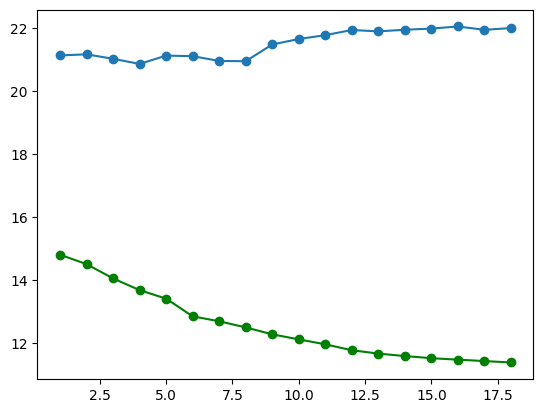

In [202]:

plt.plot(profundidades, RMSEtrain, marker='o', linestyle='-',color='g')
plt.plot(profundidades, RMSEtest, marker='o', linestyle='-')


In [ ]:
#sin limite 11 y 22
#4 da entre 13 y 21
#10 da entre 12 y 21
#20 da entre 11 y 22

In [207]:
tree = modeloa
tree_scores = cross_val_score(tree, x, y, cv=5)

lineal = modelo
lineal_scores = cross_val_score(lineal, x, y, cv=5)

In [209]:
print(tree_scores)
print(lineal_scores)

[-0.53018998  0.03964431 -0.10039116 -0.18088701  0.08875318]
[ 0.04666938  0.13192991  0.1030712  -0.00816611  0.11937602]


In [210]:
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para lineal: %0.2f (+/- %0.2f)" % (lineal_scores.mean(), lineal_scores.std() * 2))

Accuracy para Tree: -0.14 (+/- 0.44)
Accuracy para lineal: 0.08 (+/- 0.10)
